In [1]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential

2.8.2


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'truck')

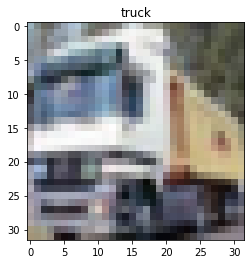

In [9]:
# visualize data by plotting images
fig,ax = plt.subplots()
ax.imshow(x_train[1])
ax.set_title(labels[y_train[1]])

In [6]:
# Lets build Model
# Base Model
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='sparse_categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [7]:

model.summary()
history = model.fit(x_train, y_train, epochs = 10,verbose=1,validation_data=(x_test,y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

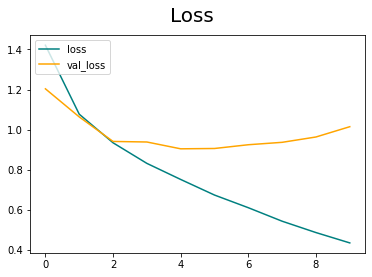

In [11]:
# Plot Performance
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

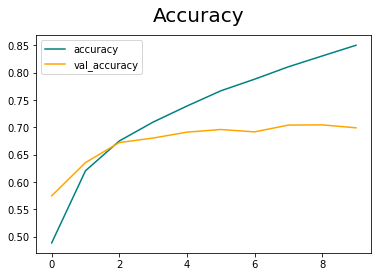

In [12]:


fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()



In [17]:
# Model 2 with dropouts
# from the above code we can see that we are facing the issue of overfitting So solve with error we ill use drop out layer,Let see
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(loss ='sparse_categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [18]:
model.summary()
history = model_1.fit(x_train, y_train, epochs = 10,verbose=1,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2